In [3]:
%pip install tensorflow
%pip install scikit-learn


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 5.6 MB/s eta 0:01:08
    --------------------------------------- 5.0/376.0 MB 13.7 MB/s eta 0:00:28
    --------------------------------------- 8.4/376.0 MB 14.9 MB/s eta 0:00:25
   - -------------------------------------- 11.5/376.0 MB 15.0 MB/s eta 0:00:25
   - -------------------------------------- 14.4/376.0 MB 14.6 MB/s eta 0:00:25
   - -------------------------------------- 17.8/376.0 MB 14.8 MB/s eta 0:00:25
   -- ------------------------------------- 20.2/376.0 MB 14.2 MB/s eta 0:00:26
   -- ------------------------------------- 23.3/376.0 MB 14.5 MB/s eta 0:00:25
   -- ------------------------------------- 27.3/376.0 MB 14.9 MB/s eta 0:00:24
   --- ------------------------------------ 32.2/376.0 MB 15.7 MB/s eta 0:00:22
   --- ------------------------------------ 35.4/376.0 MB 16.1

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ไปยังโฟลเดอร์หลักที่มี class อยู่
input_path = 'data/'  # เช่น 'dataset/'

# Path สำหรับเก็บภาพที่ผ่านการ augment แล้ว
augmented_output_path = 'augmented_dataset/'

datagen = ImageDataGenerator(
    rotation_range=10,           # หมุนภาพแบบสุ่ม ±10 องศา
    # width_shift_range=0.1,       # เลื่อนภาพในแนวนอนแบบสุ่ม ±10% ของความกว้าง
    # height_shift_range=0.1,      # เลื่อนภาพในแนวตั้งแบบสุ่ม ±10% ของความสูง
    # shear_range=0.1,             # บิดภาพแบบ shear transformation (ค่าระดับ 0.1)
    # zoom_range=0.1,              # ขยาย/ย่อภาพแบบสุ่ม ±10%
    # horizontal_flip=True,        # พลิกภาพในแนวนอนแบบสุ่ม (ซ้าย ↔ ขวา)
    fill_mode='nearest'          # กำหนดวิธีเติม pixel ที่หายหลังการแปลงภาพ (ใช้ค่าใกล้สุด)
)

# ทำ Augment สำหรับแต่ละคลาส
for class_name in os.listdir(input_path):
    class_path = os.path.join(input_path, class_name)
    save_path = os.path.join(augmented_output_path, class_name)
    os.makedirs(save_path, exist_ok=True)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        
        from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_path, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= 5:  # ทำ 5 ภาพต่อรูปต้นฉบับ
                break


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm import tqdm
from PIL import Image
import torch.nn.functional as F
from torchvision import models
from pathlib import Path
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg19 = models.vgg19(pretrained=True).to(device)
vgg19.eval()

c:\Users\papin\Desktop\python_all\yolo\Test1\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\papin\Desktop\python_all\yolo\Test1\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [8]:

# โหลดโมเดล VGG19 ที่เทรนมากับ ImageNet แล้ว และนำไปไว้บนอุปกรณ์ (GPU หรือ CPU)
vgg19 = models.vgg19(pretrained=True).to(device)
vgg19.eval()

# กำหนดการแปลงภาพก่อนนำเข้าโมเดล
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# โหลดชุดข้อมูลจากโฟลเดอร์ โดยใช้โครงสร้าง ImageFolder (แยกตาม class)
dataset = datasets.ImageFolder(root="augmented_dataset", transform=transform)

# สร้าง DataLoader สำหรับโหลดภาพทีละ 1 (batch_size=1)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# เตรียม list สำหรับเก็บ feature, label, และชื่อภาพ
features_list = []
labels_list = []

# วนลูปดึง feature ทีละภาพจาก DataLoader
for i, (img, label) in tqdm(enumerate(data_loader), total=len(data_loader)):
    img = img.to(device)  # ส่งภาพไปยังอุปกรณ์ที่ใช้ (GPU/CPU)

    with torch.no_grad():
        features = vgg19.features(img)
        features = features.view(features.size(0), -1).cpu().numpy().flatten()

    label_name = dataset.classes[label.item()]  # ดึงชื่อคลาส เช่น 'cat' หรือ 'dog'
    image_name = Path(dataset.imgs[i][0]).name  # ดึงชื่อไฟล์ภาพ เช่น 'cat1.jpg'

    features_list.append(features)
    labels_list.append(label_name)

# รวมข้อมูลทั้งหมดเป็น DataFrame โดยใช้ pandas
features_df = pd.DataFrame(features_list)
features_df['Label'] = labels_list

# เซฟ DataFrame เป็นไฟล์ CSV
features_df.to_csv("Data_Aug_Vgg19.csv", index=False)

100%|██████████| 3447/3447 [04:17<00:00, 13.38it/s]


In [3]:
df = pd.read_csv("Data_Aug_Vgg19.csv")
df = df.dropna()
df['Label'].value_counts()

Label
1    1796
0    1651
Name: count, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np
import pandas as pd
import time


X = df.drop(columns=['Label'])
y = df['Label']

label_encoder = LabelEncoder()             # สร้างอ็อบเจกต์ LabelEncoder
y_encoded = label_encoder.fit_transform(y) # แปลง label ใน y จาก string → int

X_train, X_test, b_train, b_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

A = X_train
B = b_train # Label  # Label

B.shape
B
min(b_train), max(b_train)

GN, _, G = np.unique(B, return_index = True, return_inverse=True)
vec = np.eye(len(GN))[G].astype(int)
vec


t_train = np.eye(len(GN))[b_train]
t_test = np.eye(len(GN))[b_test]

In [5]:
print("Shape Train test ")
print("X_train: ", X_train.shape)
print("t_train: ", t_train.shape)
print("b_train: ", b_train.shape)

print("X_test: ", X_test.shape)
print("t_test: ", t_test.shape)
print("b_test: ", b_test.shape)

Shape Train test 
X_train:  (2757, 25088)
t_train:  (2757, 2)
b_train:  (2757,)
X_test:  (690, 25088)
t_test:  (690, 2)
b_test:  (690,)


In [7]:
def calculate_metrics(conf_matrix):
    metrics = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        metrics.append((tp, fn, fp, tn))
        
    return metrics


def accuracy_AAc(target, predictions):
    conf_matrix = confusion_matrix(target, predictions)
    metrics = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        metrics.append((tp, fn, fp, tn))
    accuracy = (tp + tn) / (tp + fn + fp + tn) 
    average_accuracy = np.mean(accuracy) *100
    return average_accuracy

def AcPeReF1(target, predictions):
    conf_matrix = confusion_matrix(target, predictions)
    metrics = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        metrics.append((tp, fn, fp, tn))

    accuracy = [(tp + tn) / (tp + fn + fp + tn) for tp, fn, fp, tn in metrics]
    precisions_Train = [tp / (tp + fp) * 100 if (tp + fp) > 0 else 0 for tp, fn, fp, tn in metrics]
    recalls_Train    = [tp / (tp + fn) * 100 if (tp + fn) > 0 else 0 for tp, fn, fp, tn in metrics]
    f1_scores_Train  = [
        (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
        for precision, recall in zip(precisions_Train, recalls_Train)]
    
    mean_accuracy = np.mean(accuracy) *100
    mean_precision = np.mean(precisions_Train)
    mean_recall = np.mean(recalls_Train)
    mean_f1 = np.mean(f1_scores_Train)

    return mean_accuracy, mean_precision, mean_recall, mean_f1

def Loss(output, target, Iter):
    output = output
    h = np.exp(output)
    Sume = np.sum(h, axis=1)
    softmax = h / Sume[:, np.newaxis] # Softmax

    TargetTrain = np.array(target)
    NumberTrain = target.shape[0]

    Cross = TargetTrain * np.log10(softmax)

    SumCross = np.sum(Cross)
    Err_Train = -SumCross / (6 * NumberTrain) # Multi Crossentropy Loss
    
    return Err_Train

def dotmatlab(a, b):

    result = np.sum(np.sum(a * b, axis=0))

    return result

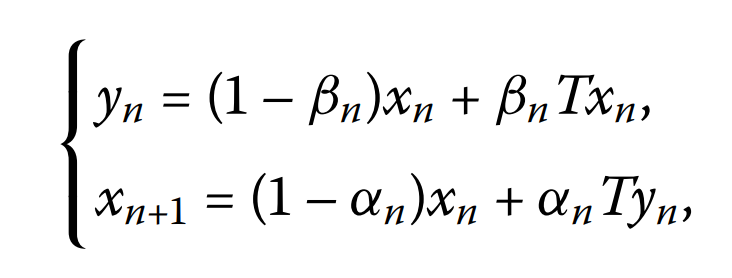

In [8]:
def Ishikawa(A, b, Iter, x0):
    #Step1

    alpha = 0.9
    beta = 0.9

    L0 = 0.9 / (np.max(np.linalg.eig(np.dot(A.T, A))[0]))


    #Step2
    calGrad1 = np.dot(A.T, np.dot(A, x0) - b)  #A^TAx -b

    yn = (1-beta)*x0 + beta* (x0 - L0 * calGrad1)

    calGrad2 = np.dot(A.T, np.dot(A, yn) - b)

    xn = (1-alpha)*x0 + alpha* (yn - L0 * calGrad2) 

    x0 = xn

    return xn, x0

1) Accuracy(train=66.1951, test=65.9420
2) Accuracy(train=76.7501, test=76.3768
3) Accuracy(train=81.3928, test=81.0145
4) Accuracy(train=83.0613, test=81.4493
5) Accuracy(train=83.4966, test=82.8986
6) Accuracy(train=83.8955, test=83.6232
7) Accuracy(train=83.8593, test=83.7681
8) Accuracy(train=83.8955, test=84.2029
9) Accuracy(train=83.9681, test=84.4928
10) Accuracy(train=84.1132, test=84.4928
11) Accuracy(train=84.0406, test=84.9275
12) Accuracy(train=84.2220, test=85.0725
13) Accuracy(train=84.1857, test=85.2174
14) Accuracy(train=84.2945, test=85.0725
15) Accuracy(train=84.3308, test=85.0725
16) Accuracy(train=84.5122, test=85.9420
17) Accuracy(train=84.6572, test=85.9420
18) Accuracy(train=84.6572, test=85.7971
19) Accuracy(train=84.6935, test=86.0870
20) Accuracy(train=84.7661, test=85.9420
21) Accuracy(train=84.8749, test=85.9420
22) Accuracy(train=84.9111, test=85.9420
23) Accuracy(train=84.9837, test=85.9420
24) Accuracy(train=85.0925, test=86.0870
25) Accuracy(train=85.201

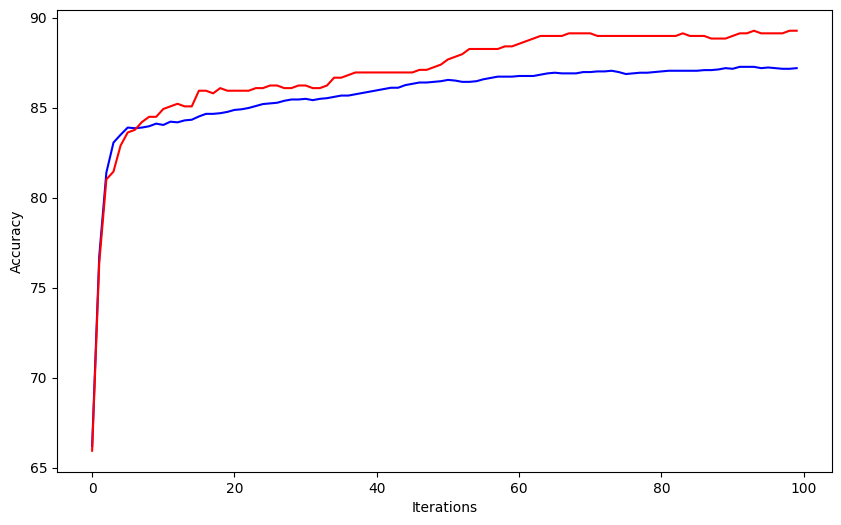

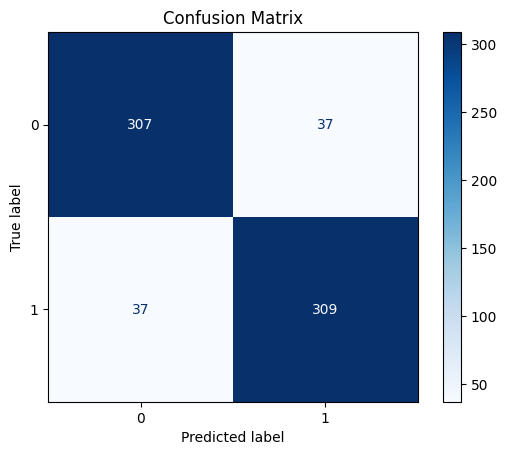

ค่า accuracy_test,Precision,Recall,F1-score = [89.2754, 89.2753, 89.2753, 89.2753]


In [11]:
np.random.seed(24)

Hidden_Node = 100
nnn = t_train.shape[1]

iterations = 100

n = 1

train_acc_list = []
test_acc_list = []
Loss_Train = []
Loss_Test = []


x0 = np.zeros((Hidden_Node, nnn))


dim = X_train.shape[1]

input_weight = np.random.uniform(-1, 1, size=(dim, Hidden_Node))
bias = np.random.uniform(-0.5, 0.5, size=(1, Hidden_Node))
H = expit(np.dot(X_train, input_weight) + np.tile(bias, (X_train.shape[0], 1)))

start_time = time.time()

for i in range(iterations):
    output_weight, x0 = Ishikawa(H, t_train, n, x0)
    

    output_train = np.dot(H, output_weight)
    predictions_train = np.argmax(output_train, axis=1)
    b_train_flat = b_train.flatten()
    conf_matrix_Train = confusion_matrix(b_train_flat, predictions_train)
    accuracy_train = accuracy_AAc(b_train_flat, predictions_train)
    Loss_Train.append(Loss(output_train,t_train,i))

    H_test = expit(np.dot(X_test, input_weight) + bias)
    output_test = np.dot(H_test, output_weight)
    predictions_test = np.argmax(output_test, axis=1)
    b_test_flat = b_test.flatten()
    conf_matrix = confusion_matrix(b_test_flat, predictions_test)
    accuracy_test = accuracy_AAc(b_test_flat, predictions_test)
    Loss_Test.append(Loss(output_test,t_test,i))


    train_acc_list.append(accuracy_train)
    test_acc_list.append(accuracy_test)

    print(f"{n}) Accuracy(train={accuracy_train:.4f}, test={accuracy_test:.4f}")
    n += 1

end_time = time.time()

print(f"ใช้เวลาทั้งหมด: {end_time:.2f} วินาที")

plt.figure(figsize=(10, 6))
plt.plot(train_acc_list, label='Train Accuracy', color='blue')
plt.plot(test_acc_list, label='Test Accuracy', color='red')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')

plt.show()

# สร้าง confusion matrix และแสดงผล
conf_matrix = confusion_matrix(b_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


result = AcPeReF1(b_test_flat, predictions_test)

rounded_result = [round(float(x), 4) for x in result]

print(f"ค่า accuracy_test,Precision,Recall,F1-score = {rounded_result}")

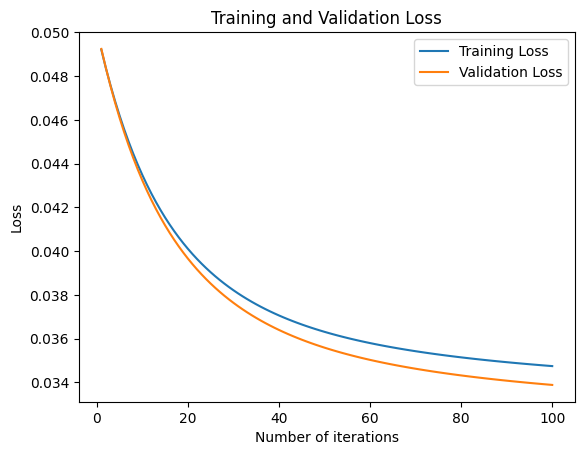

In [12]:
plt.plot(range(1, iterations + 1), Loss_Train[:iterations], label='Training Loss')
plt.plot(range(1, iterations + 1), Loss_Test[:iterations], label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
# plt.xlim(0, iterations + 1)
# plt.ylim(0.1, 0.12)
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig('Loss Alg2Case3.png', dpi=300)
plt.show()